# Исследование данных о российском кинопрокате



**Перед нами стоит задача изучить рынок российского кинопроката и выявить текущие тренды. Особенное внимание мы уделим фильмам, которые получили государственную поддержку, и попробуем разобраться, насколько такие фильмы интересны зрителю. Заказчиком данного исследования выступает Министерство культуры Российской Федерации.<br>
Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.**

**Нам предоставлены 2 csv-файла с данными о прокатных удостоверениях и данные о прокате в российских кинотеатрах.**

### Шаг 1. Загрузка файлов с данными и объединение их в один датафрейм

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import warnings

In [2]:
#откроем таблицу с данными о прокатных удостоверениях
absolute_path1 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Исследование данных о российском кинопрокате\mkrf_movies.csv'

data1 = pd.read_csv(absolute_path1)

In [3]:
#ознакомимся с ней
data1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
#откроем таблицу с данными о прокате в российских кинотеатрах
absolute_path2 = r'C:\Users\ekate\OneDrive\Документы\Проекты по Анализу данных\Исследование данных о российском кинопрокате\mkrf_shows.csv'

data2 = pd.read_csv(absolute_path2)

In [6]:
#ознакомимся с ней
data2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


**Объединять данные из двух таблиц будем по общему столбцу 'puNumber'. На основании команд info() мы видим, что тип данных этого столбца в двух датасетах различается, исправим это.**

In [8]:
data2['puNumber'] = data2['puNumber'].astype('str')

In [9]:
#проверяем изменения
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [10]:
data1['puNumber'] = data1['puNumber'].astype('str')

In [11]:
#поменяем также тип данных в столбце 'show_start_date'
data1['show_start_date'] = pd.to_datetime(data1['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')

In [12]:
#проверяем изменения
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [13]:
#объединим две таблицы с данными в одну для удобства анализа
data = pd.merge(data1, data2, on='puNumber', how='left')

In [14]:
#проверяем, что появился столбец 'box_office'
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

### Шаг 2. Предобработка данных

In [16]:
#найдем аномальные значения в столбце с рейтингом фильмов
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [17]:
#удалим знаки процентов
data['ratings'] = data['ratings'].str.rstrip('%')

In [18]:
#изменим тип данных
data['ratings'] = data['ratings'].astype('float')

In [19]:
#исправим данные по рейтингу фильмов на корректные
data.loc[data['ratings'] > 10, 'ratings'] = data.loc[data['ratings'] > 10, 'ratings'] / 10

In [20]:
#проверим, что все в порядке
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

**Пропуски есть в столбцах 'producer', 'director' и 'film_studio', но в них мы не имеем возможности их корректно заполнить. Зато мы можем заполнить пропуски в столбце 'refundable_support' на нулевые значения, так как если эти ячейки пусты, значит государственной поддержки не было.**

In [21]:
data['refundable_support'] = data['refundable_support'].fillna(0)

In [22]:
#то же касается и столбца 'nonrefundable_support'
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)

In [23]:
#в столбце 'budget' также можно заменить пропуски на нулевые значения
data['budget'] = data['budget'].fillna(0)

In [24]:
#в столбце 'financing_source' отсутствующие значения источника финансирования заменим на 'нет'
data['financing_source'] = data['financing_source'].fillna('нет')

**Столбцы с рейтингом и жанром трогать не будем, так как нет возможности корректно заполнить эти данные. То же касается и информации о сборах в рублях.**

In [25]:
#посмотрим на результат наших замен
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   object        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     7486 non-null   float64       
 10  nonrefundable_support  7486 non-null   float64       
 11  budget                 7486 non-null   float64       
 12  financing_source       7486 non-null   object        
 13  rat

In [26]:
#посмотрим дубликаты в столбце с названиями
data.loc[data.duplicated(['title'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,7.7,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,0.0,нет,8.2,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"триллер,криминал,детектив",NaN


**Мы видим некоторые дубликаты в столбце с названиями фильмов, но их немного, и они не повлияют на анализ данных, поэтому их можно проигнорировать. Дубликаты могут встречаться в столбцах 'show_start_date', 'type', 'film_studio', 'production_country', 'director', 'producer', 'age_restriction', 'financing_source', 'ratings', 'genres', что совершенно логично и нормально для изучаемых нами данных.**

In [27]:
#поищем дубликаты в столбце с прокатными удостоверениями
data.loc[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,нет,6.8,"комедия,криминал",NaN


In [28]:
#выведем эти строки на экран
data.loc[data['puNumber'] == '221154310']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,7.6,"драма,мелодрама,история",NaN


In [29]:
data.loc[data['puNumber'] == '221054410']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,нет,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,нет,6.8,"комедия,криминал",NaN


In [30]:
data['puNumber'] = data['puNumber'].drop_duplicates()

**Мы избавились от строк-дубликатов с одинаковыми номерами прокатных удостоверений.**

In [31]:
#посмотрим на уникальные значения столбца 'type'
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

**Избавимся от дубликатов в столбце 'type'.**

In [86]:
data['type'] = data['type'].str.strip()

In [87]:
#проверим, что сработало
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

**В столбцах с режиссером, продюссером и жанром есть проблема, которая заключается в том, что данные в строках не разделены пробелами. Исправим это.**

In [34]:
#зададим команду для игнорирования предупреждающих сообщений
warnings.filterwarnings("ignore")

In [35]:
data['director'] = data['director'].str.replace(r',([^ ])', r', \1')

In [36]:
data['producer'] = data['producer'].str.replace(r',([^ ])', r', \1')

In [37]:
data['genres'] = data['genres'].str.replace(r',([^ ])', r', \1')

In [38]:
#проверим, что теперь все в порядке
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,нет,7.2,"боевик, драма, мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,нет,6.6,"драма, военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN


In [39]:
#так как инициалы и фамилия прописаны без пробела, исправим это
data['producer'] = data['producer'].str.replace('.', '. ')

In [40]:
data['director'] = data['director'].str.replace('.', '. ')

In [41]:
#проверим, что теперь все в порядке
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,нет,7.2,"боевик, драма, мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е. Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,нет,6.6,"драма, военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN


In [42]:
#посмотрим, есть ли подозрительные строки
problem_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]

In [43]:
#выведем на экран
problem_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А. Зайцев,"О. Гранина, А. Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р. Прыгунов,"П. Ануров, Ф. Бондарчук, Д. Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А. Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик, драма, криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д. Штурманова,Т. Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия, фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М. Фадеев,А. Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм, приключения, фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М. Местецкий,"Р. Борисевич, А. Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия, драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф. Бондарчук, Т. Вайнштейн, Д. Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия, мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В. Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д. Тюрин,"Ф. Бондарчук, Т. Вайнштейн, Д. Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия, мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф. Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


In [44]:
#избавимся от этих строк, так как они некорректны и неинформативны
data = data[data['budget'] >= (data['refundable_support'] + data['nonrefundable_support'])]

In [45]:
#создадим столбец с информацией о годе проката
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')

In [46]:
data['rental_year'] = data['show_start_date'].dt.year

In [47]:
#проверим, что столбец появился
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,нет,7.2,"боевик, драма, мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е. Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,нет,6.6,"драма, военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [48]:
#создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма.
#В столбцы войдут первые значения из списка режиссёров и жанров соответственно
def main(data, columns):
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(', ')[0])
    return data

In [49]:
#перезапишем датафрейм,добавив новые столбцы с помощью функции
data = main(data, ['director', 'genres'])

In [50]:
#проверим, что столбцы появились
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,main_director,main_genres
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,0.0,нет,7.2,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е. Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,0.0,нет,6.6,"драма, военный",NaN,2016,Е. Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.0,0.0,0.0,нет,6.8,"фантастика, боевик, триллер",NaN,2015,Тимур Бекмамбетов,фантастика


In [51]:
#добавим столбец с информацией о доле государственной поддержки
data['budget_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [52]:
#проверим, что все корректно
data.loc[data['budget_share']>0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,main_director,main_genres,budget_share
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А. Атанесян,"А. Атанесян, М. Бабаханов, Р. Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма, мелодрама",3.653536e+05,2013,А. Атанесян,драма,0.333703
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А. Якимчук,А. Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А. Якимчук,NaN,0.700000
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р. Давлетьяров, С. Комаров","Р. Давлетьяров, А. Котелевский, А. Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия, фантастика",1.995703e+07,2013,Р. Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е. Миндадзе (псевдоним Катя Шагалова),Л. Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е. Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М. Угаров,"А. Миндадзе, Л. Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М. Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А. Кравчук,"А. Максимов, К. Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история, биография, драма",7.177032e+08,2019,А. Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д. Шмидт, К. Феоктистов","С. Сельянов, А. Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм, приключения, семейный",5.010692e+08,2019,Д. Шмидт,мультфильм,0.526316
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф. Бондарчук,"Ф. Бондарчук, М. Врубель, А. Андрющенко, Д. Ру...",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика, боевик",NaN,2019,Ф. Бондарчук,фантастика,0.529661
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И. Северов,С. Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И. Северов,драма,0.649998


In [53]:
#посчитаем, какую долю в бюджете фильма чаще всего составляет господдержка
data['budget_share'].median()

0.5922645480995804

**Чаще всего доля государственной поддержки фильма составляет в районе 60% от бюджета.**

### Шаг 3. Исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

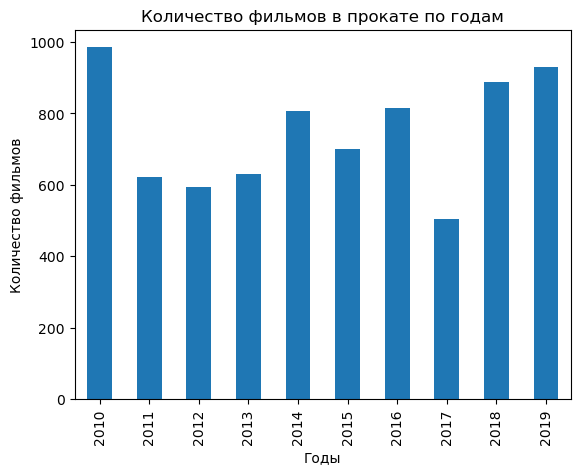

In [54]:
#построим столбчатую диаграмму с количеством фильмов по годам
import matplotlib.pyplot as plt
# создаем сводную таблицу и строим гистограмму
data.pivot_table(index='rental_year', values='title', aggfunc='count').plot(title='Количество фильмов в прокате по годам', kind='bar', legend=False)
ax = plt.gca()
# подписываем ось x
ax.set_xlabel('Годы')
# подписываем ось y
ax.set_ylabel('Количество фильмов')
# отображаем график
plt.show()

In [55]:
#посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах 
data['box_office'].count() / data['title'].count()

0.420538224661936

**По построенной столбчатой диаграмме видно, что больше всего фильмов выходило в 2010, 2018 и 2019 годах. А меньше всего - в 2017. Информация о прокате в кинотеатрах есть в 42% случаев от общего объема данных, то есть меньше половины.**

In [56]:
#приведем цифры в столбцах в более привычный вид для удобства анализа
pd.options.display.float_format = '{:.2f}'.format

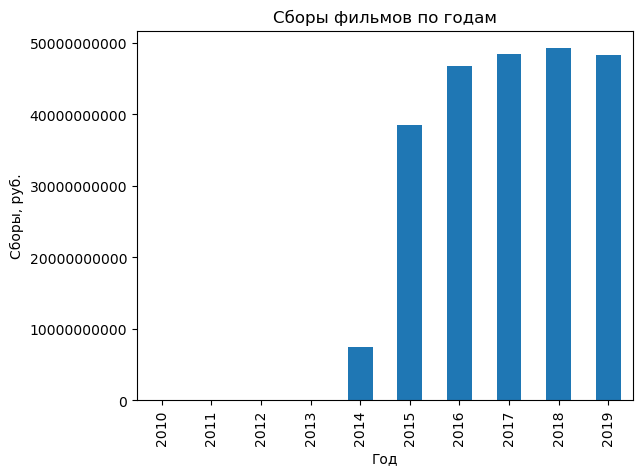

In [57]:
#построим столбчатую диаграмму со сборами фильмов по годам
data.pivot_table(index='rental_year', values='box_office', aggfunc='sum').plot(kind='bar', title='Сборы фильмов по годам', legend=False)
ax = plt.gca()
# подпись осей
ax.set_xlabel('Год')
ax.set_ylabel('Сборы, руб.')
ax.ticklabel_format(style='plain', axis='y')
plt.show()

**По полученной диаграмме видно, что сборы фильмов начали расти с 2014 года, особенно резкий скачок заметен начиная с 2015 года. С 2016 по 2019 годы сборы были стабильны и почти одинаковы, в районе 50 млрд руб. Возможно, диаграмма не совсем отображает действительность, так как данных о сборах за фильмы за 2010-2014 годы меньше. Проверим эту гипотезу.**

In [58]:
data.groupby('rental_year')['box_office'].count()

rental_year
2010    105
2011    109
2012    128
2013    184
2014    278
2015    459
2016    523
2017    355
2018    471
2019    529
Name: box_office, dtype: int64

**По итогу группировки мы видим, что действительно информации о количестве фильмов в прокате за 2010-2014 годы меньше, что обуславливает результаты полученной выше диаграммы. То есть скорее всего они не вполне отображают действительность (так как мы знаем, что фильмов, допустим, в 2010 году наоборот выходило очень много). Период же с 2015 по 2019 годы представлен наиболее полно, а значит и данные о сборах по этим годам можно считать корректными и показательными.**

**Максимальная сумма сборов была в 2018 году, а минимальная - в 2015 (вывод для справедливого анализа делаем по наиболее представленному периоду).**

In [59]:
#построим сводную таблицу с информацией о средней сумме сборов по годам
data.pivot_table(index='rental_year', values='box_office', aggfunc='mean')

,box_office
rental_year,
2010,23130.04
2011,129383.17
2012,54339.24
2013,161954.92
2014,26743589.36
2015,83938621.35
2016,89373453.67
2017,136501823.25
2018,104568983.88


In [60]:
#построим сводную таблицу с информацией о медианной сумме сборов по годам
data.pivot_table(index='rental_year', values='box_office', aggfunc='median')

,box_office
rental_year,
2010,1700.00
2011,3000.00
2012,5660.00
2013,3522.50
2014,18137.50
2015,4784781.50
2016,3776087.56
2017,9919415.00
2018,8751895.75


**Можно сделать вывод, что значения среднего арифметического слишком сильно отличаются из-за того, что само количество сборов очень сильно различается, и в датасете присутствуют данные, значения которых сильно выделяются. Они и искажают результат среднего арифметического. Значит лучше при анализе опираться на значения медианы. В среднем самые большие сборы на каждый конкретный фильм были в 2017 году. В 2015 и 2019 годах сборы, напротив, были самыми скромными. (Период с 2010 по 2014 годы во внимание не берем в связи с недостаточностью информации по этим годам.)**

In [61]:
#посмотрим, фильмы с каким возрастным рейтингом заработали больше всего денег за период с 2015 по 2019 год
data.loc[data['rental_year']>=2015].groupby('age_restriction')['box_office'].sum().sort_values()

age_restriction
«0+» - для любой зрительской аудитории     809077425.97
«18+» - запрещено для детей              40757657833.61
«6+» - для детей старше 6 лет            55220193077.92
«12+» - для детей старше 12 лет          59369189769.50
«16+» - для детей старше 16 лет          75102265973.60
Name: box_office, dtype: float64

In [62]:
#посмотрим, фильмов с каким рейтингом больше всего выходило за изучаемый период
data.loc[data['rental_year']>=2015]['age_restriction'].value_counts(ascending=True)

«0+» - для любой зрительской аудитории     317
«6+» - для детей старше 6 лет              479
«12+» - для детей старше 12 лет            786
«18+» - запрещено для детей               1085
«16+» - для детей старше 16 лет           1166
Name: age_restriction, dtype: int64

In [63]:
#напишем функцию для создания нового столбца с краткой информацией по возрастному рейтингу (для удобства чтения графиков)
def age_category(age_restriction):
    if 'для любой зрительской аудитории' in age_restriction:
        return '0+'
    elif 'для детей старше 6 лет' in age_restriction:
        return '6+'
    elif 'для детей старше 12 лет' in age_restriction:
        return '12+'
    elif 'для детей старше 16 лет' in age_restriction:
        return '16+'
    elif 'запрещено для детей' in age_restriction:
        return '18+'

In [64]:
#применим функцию
data['age'] = data['age_restriction'].apply(age_category)

In [65]:
#посмотрим, появился ли столбец
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,rental_year,main_director,main_genres,budget_share,age
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,...,0.00,нет,7.20,"боевик, драма, мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,18+
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е. Матвеев,NaN,«6+» - для детей старше 6 лет,0.00,...,0.00,нет,6.60,"драма, военный",NaN,2016,Е. Матвеев,драма,NaN,6+
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.00,...,0.00,нет,6.80,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,18+
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.00,...,0.00,нет,6.80,"фантастика, боевик, триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,18+
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е. Платт, Яйн ...",«18+» - запрещено для детей,0.00,...,0.00,нет,6.80,"фантастика, боевик, триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN,18+


<Axes: xlabel='age'>

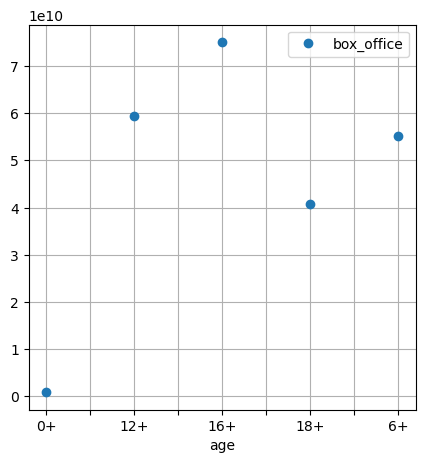

In [66]:
#построим график, по которому будет видно, как количество выходивших фильмов c 2015 по 2019 по каждому возрастному ограничению коррелирует с количеством сборов
data.loc[data['rental_year']>=2015].pivot_table(index='age', values='box_office', aggfunc='sum').plot(grid=True, style='o', figsize=(5, 5))

**По полученному графику можно сделать вывод, что самую большую выручку приносят фильмы с рейтингом "16+". Также много ходят на фильмы "12+" и "6+". Фильмы "18+" у зрителей менее популярны. А самые низкие по сборам - фильмы "0+". Т.е. возрастное ограничение влияет на выручку фильмов.**

<Axes: xlabel='rental_year'>

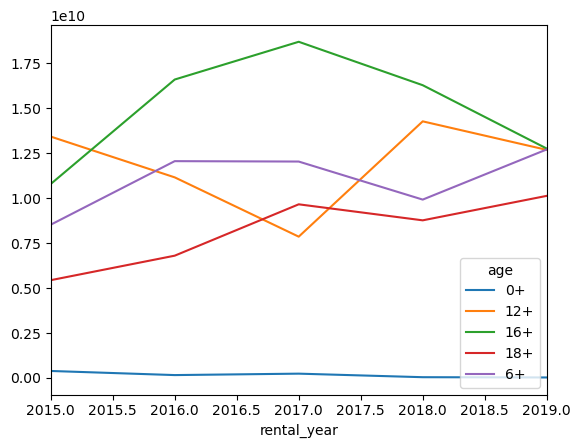

In [67]:
#построим график сборов в зависимости от возрастного ограничения по годам
data[data['box_office'].notna()].pivot_table(index='rental_year', columns='age', values='box_office', aggfunc='sum').plot(kind='line', xlim=[2015, 2019])

**Можно сделать вывод, что фильмы "0+" с 2015 по 2019 годы всегда приносили меньше всего сборов, а фильмы "16+" - абсолютные лидеры по сборам (за исключением только 2015 года, где их немного обогнали фильмы "12+"), но это не влияет на общую тенденцию. Общая картина кассовых сборов сохраняется в соответствии с нашим общим графиком без разбивки по годам. Но стоит отметить, что у фильмов с рейтингом "12+" наблюдается ощутимое снижение кассовых сборов в период с 2015 до 2017 года, а потом опять идет увеличение их объема. Теоретически это может быть связано с тем, в этот период количество выходящих в прокат фильмов "12+" уменьшалось. Проверим эту теорию.**

In [68]:
data[data['age'] == '12+'].groupby('rental_year')['age'].count()

rental_year
2010    201
2011     79
2012     82
2013    174
2014    268
2015    136
2016    134
2017     70
2018    243
2019    203
Name: age, dtype: int64

**Так и есть, наша теория подтверждается.**

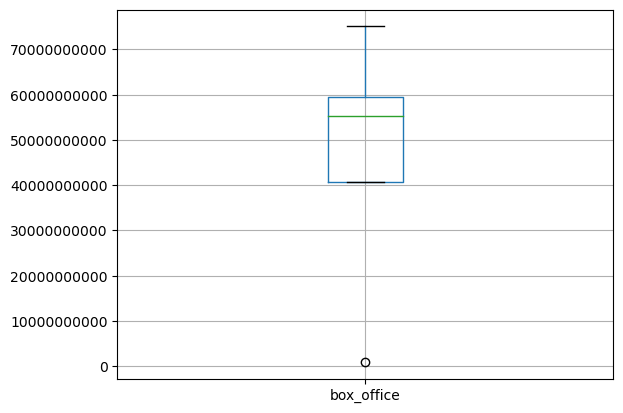

In [69]:
#построим диаграмму размаха
data.loc[data['rental_year']>=2015].pivot_table(index='age', values='box_office', aggfunc='sum').boxplot()
ax = plt.gca()
# изменяем форматирование оси y на обычный
ax.ticklabel_format(style='plain', axis='y')
# отображаем график
plt.show()

**По построенной диаграмме размаха видно, что за период с 2015 по 2019 годы сборы фильмов в каждой возрастной категории составляли обычно чуть больше 50,5 млрд рублей (медианное значение). Так же есть категории, получившие меньшую выручку с 2015 по 2019 (таких категорий больше, чем тех, которым удалось заработать более 5,5 млрд руб.)**

### Шаг 4. Исследование фильмов, которые получили государственную поддержку

In [70]:
#создадим столбец с общей суммой господдержки
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

In [71]:
#сделаем, чтобы было видно все столбцы таблицы
pd.set_option('display.max_columns', None)

In [72]:
#посмотрим, все ли в порядке
data[data['total_support']>0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,main_director,main_genres,budget_share,age,total_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А. Атанесян,"А. Атанесян, М. Бабаханов, Р. Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма, мелодрама",365353.60,2013,А. Атанесян,драма,0.33,16+,26500000.00
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А. Якимчук,А. Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,NaN,28140.00,2014,А. Якимчук,NaN,0.70,12+,26000000.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р. Давлетьяров, С. Комаров","Р. Давлетьяров, А. Котелевский, А. Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия, фантастика",19957031.50,2013,Р. Давлетьяров,комедия,0.61,12+,107847945.00
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е. Миндадзе (псевдоним Катя Шагалова),Л. Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е. Миндадзе (псевдоним Катя Шагалова),драма,0.69,16+,28000000.00
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М. Угаров,"А. Миндадзе, Л. Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М. Угаров,драма,0.62,16+,25000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А. Кравчук,"А. Максимов, К. Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история, биография, драма",717703185.53,2019,А. Кравчук,история,0.51,12+,500000000.00
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д. Шмидт, К. Феоктистов","С. Сельянов, А. Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм, приключения, семейный",501069235.00,2019,Д. Шмидт,мультфильм,0.53,6+,100000000.00
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф. Бондарчук,"Ф. Бондарчук, М. Врубель, А. Андрющенко, Д. Ру...",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика, боевик",NaN,2019,Ф. Бондарчук,фантастика,0.53,12+,500000000.00
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И. Северов,С. Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И. Северов,драма,0.65,12+,30000000.00


In [73]:
#посчитаем среднее значение господдержки
data[data['total_support']>0]['total_support'].mean()

59710218.56190476

In [74]:
#посчитаем медиану господдержки
data[data['total_support']>0]['nonrefundable_support'].median()

30000000.0

**В среднем фильмы получают поддержку от государства в сумме равной примерно 30 млрд рублей.**

In [75]:
#создадим столбец с информацией об окупаемости фильмов
data['payback'] = data['box_office'] - data['budget']

In [76]:
#ознакомимся с получившимися данными
data[data['total_support']>0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rental_year,main_director,main_genres,budget_share,age,total_support,payback
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А. Атанесян,"А. Атанесян, М. Бабаханов, Р. Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма, мелодрама",365353.60,2013,А. Атанесян,драма,0.33,16+,26500000.00,-79046546.40
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А. Якимчук,А. Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,NaN,28140.00,2014,А. Якимчук,NaN,0.70,12+,26000000.00,-37114717.00
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р. Давлетьяров, С. Комаров","Р. Давлетьяров, А. Котелевский, А. Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия, фантастика",19957031.50,2013,Р. Давлетьяров,комедия,0.61,12+,107847945.00,-156066458.50
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е. Миндадзе (псевдоним Катя Шагалова),Л. Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,Е. Миндадзе (псевдоним Катя Шагалова),драма,0.69,16+,28000000.00,-40518222.50
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М. Угаров,"А. Миндадзе, Л. Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,М. Угаров,драма,0.62,16+,25000000.00,-39783022.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А. Кравчук,"А. Максимов, К. Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история, биография, драма",717703185.53,2019,А. Кравчук,история,0.51,12+,500000000.00,-262296814.47
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д. Шмидт, К. Феоктистов","С. Сельянов, А. Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм, приключения, семейный",501069235.00,2019,Д. Шмидт,мультфильм,0.53,6+,100000000.00,311069235.00
7474,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф. Бондарчук,"Ф. Бондарчук, М. Врубель, А. Андрющенко, Д. Ру...",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика, боевик",NaN,2019,Ф. Бондарчук,фантастика,0.53,12+,500000000.00,NaN
7476,Я свободен,111023019,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И. Северов,С. Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,NaN,2019,И. Северов,драма,0.65,12+,30000000.00,NaN


In [77]:
#посмотрим число строк окупившихся фильмов
len(data.loc[(data['total_support'] > 0) & (data['payback'] > 0), ['total_support', 'payback']])

66

In [78]:
#посмотрим число неокупившихся фильмов
len(data.loc[(data['total_support'] > 0) & (data['payback'] <= 0), ['total_support', 'payback']])

235

**Получается, что количество неокупившихся фильмов, при создании которых привлекалась господдержка, в 3,5 раза больше, чем количество окупившихся!**

In [79]:
#посмотрим медиану окупаемости для всех фильмов, о которых есть информация о сборах, снятых без господдержки
data.loc[(data['box_office']>0) & (data['total_support']==0), 'payback'].median()

2088912.75

In [80]:
#посмотрим медиану окупаемости по фильмам с господдержкой
data.loc[(data['box_office']>0) & (data['total_support']>0), 'payback'].median()

-43363736.0

**Картина неутешительная для фильмов с господдержкой. Среднестатистический фильм, снятый без госпеддержки, приносит более 2 млн рублей, в то время как фильмы с господдержкой в среднем снимаются в убыток в 43 млн рублей.**

In [81]:
#посмотрим медианный рейтинг для всех фильмов, о которых есть информация о сборах, снятых без господдержки
data.loc[(data['box_office']>0) & (data['total_support']==0), 'ratings'].median()

6.4

In [82]:
#посмотрим медианный рейтинг для всех фильмов, о которых есть информация о сборах, снятых с господдержкой
data.loc[(data['box_office']>0) & (data['total_support']>0), 'ratings'].median()

6.2

**Выходит, что рейтинги у фильмов без господдержки и с господдержкой почти одинаковые, 6.4 и 6.2 соответственно, чего не скажешь об их окупаемости.**

In [83]:
#можем посмотреть рейтинг самых неудачных режиссеров
data.loc[(data['box_office']>0) & (data['total_support']>0)].groupby('director')['ratings'].median().sort_values()

director
М. Свешников                          1.00
Т. Кеосаян                            2.50
О. Лопато                             2.80
Ф. Коршунов при участии П. Мирзоева   2.90
Т. Корнев                             3.10
                                      ... 
Е. Баранов                             NaN
И. Угольников                          NaN
К. Сухарьков                           NaN
О. Трофим                              NaN
Ю. Грымов                              NaN
Name: ratings, Length: 262, dtype: float64

In [84]:
#а теперь наоборот самых талантливых
data.loc[(data['box_office']>0) & (data['total_support']>0)].groupby('director')['ratings'].median().sort_values(ascending=False)

director
Ю. Кара                               9.40
Н. Степанова при участии С. Иванова   9.00
Р. Прыгунов                           8.20
А. Атанесян                           8.10
К. Оганисян                           7.90
                                      ... 
Е. Баранов                             NaN
И. Угольников                          NaN
К. Сухарьков                           NaN
О. Трофим                              NaN
Ю. Грымов                              NaN
Name: ratings, Length: 262, dtype: float64

**М. Свешников получил самый худший рейтинг за свой фильм 1.0, а Ю. Кара получил просто превосходную оценку в 9.4 балла!**

In [85]:
#посмотрим, фильмы каких режиссеров больше всего провалились в прокате, а какие, напротив, имели успех
data.loc[(data['box_office']>0) & (data['total_support']>0)].groupby('director')['payback'].median().sort_values()

director
О. Степченко                                                                         -1971477243.41
А. Михалков (псевдоним А. Кончаловский)                                               -725698762.29
А. Учитель                                                                            -521130409.00
А. Мельник                                                                            -427421682.60
И. Зайцев, О. Урушев                                                                  -361663692.47
                                                                                          ...      
Д. Киселев, А. Першин (Ж. Крыжовников), А. Карпиловский, А. Черномазов (А. Нужный)     681069130.00
Н. Лебедев                                                                             766971523.00
О. Трофим                                                                             1297146575.89
А. Сидоров                                                                            17079

**Самый плохой фильм снял О. Степченко, а самый прибыльный - А. Мегердичев.**

### Шаг 5. Напишите общий вывод

**Нам были предоставлены два датасета с информацией по фильмам, выходившим в прокат с 2010 по 2019 годы. Для удобства анализа мы сразу же объединили две таблицы в одну по общему столбцу с номером прокатного удостоверения фильмов. Для корректного анализа сначала мы произвели предобработку данных: при необходимости преобразовали типы данных; по возможности заполнили пропуски в данных, где это было возможно; избавились от дубликатов; исправили проблемные значения в данных. Далее для наиболее полноценного анализа нами были добавлены новые столбцы в таблицу, которые впоследствии пригодились для расчетов.<br>
После этого мы приступили непосредственно к исследованию. Было установлено, что больше всего фильмов выходило в 2010, 2018 и 2019 годах. А меньше всего - в 2017.<br>
На основе диаграммы мы сделали вывод, что анализ стоит производить только за период с 2015 по 2019 год (так как в этот период наиболее полно представлена информация по кассовым сборам). Максимальная сумма сборов была в 2018 году, а минимальная - в 2015.
В среднем самые большие сборы на каждый конкретный фильм были в 2017 году. В 2015 и 2019 годах сборы, напротив, были самыми скромными.<br>
Построив график мы установили, что самую большую выручку приносят фильмы с рейтингом "16+". Также много ходят на фильмы "12+" и "6+". Фильмы "18+" у зрителей менее популярны. А самые низкие по сборам - фильмы "0+". Т.е. возрастное ограничение напрямую влияет на выручку фильмов.<br>
На конечном этапе исследования мы обратились к фильмам с господдержкой. Посчитали, что в среднем фильмы получают поддержку от государства в сумме равной примерно 30 млрд рублей. Количество неокупившихся фильмов, при создании которых привлекалась господдержка, в 3,5 раза больше, чем количество окупившихся. Среднестатистический фильм, снятый без госпеддержки, приносит более 2 млн рублей, в то время как фильмы с господдержкой в среднем снимаются в убыток в 43 млн рублей. А вот медианный рейтинг у фильмов без господдержки и с господдержкой почти одинаковый (6.4 и 6.2 соответственно). Министерству культуры можно посоветовать в дальнейшем продолжать сотрудничать с режиссёрами, которые получили высокие рейтинги за свои фильмы (Ю. Кара, Н. Степанова, Р. Прыгунов,А. Атанесян, К. Оганисян и др.), а также с теми, кому удалось побить рекорды по кассовым сборам (среди фильмов, снятых с господдержкой), а именно А. Мегердичев, А. Сидоров, О. Трофим, Н. Лебедев, Д. Киселев, А. Першин (Ж.Крыжовников), А. Карпиловский, А. Черномазов (А. Нужный) и др.**